**Домашнее задание №2 (Математические основы машинного обучения)**

# 1.  Для синтетических данных:

- Сгенерируйте различные линейные, полиномиальные и другие зависимости отличные от тех, что в примере(как минимум 3 поднабора).
- Проверьте как с этими наборами справятся полиномы различной степени и разные типы регуляризации (для каждого набора проверьте как минимум по 2 модели).
- Для удобства можете создать новые функции. 

In [1]:
#импортируем библиотеки:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE 

## Общие функции

СОЗДАНИЕ ФУНКЦИЙ ДЛЯ ГЕНЕРАЦИИ СИНТЕТИЧЕСКИХ ДАННЫХ

In [2]:
#истинные значения:
def true_fun(x, a=np.pi, b = 0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x:x # line
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],axis=0)

    return f(x+ b)

#шум:
def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

In [3]:
#генерация синтетических чисел:
def dataset(a, b, f = None,  N = 250, x_max =1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N))*x_max    
    else:
        x = np.linspace(0,x_max,N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true=np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

## Визуализация

In [4]:
#визуализация:
def vis_data(y, y_true,x, title):
    plt.figure(figsize=(14,8))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize=30)
    plt.ylabel('y',fontsize=30)
    plt.legend(fontsize=20)
    plt.title(title, fontsize=20)
    plt.xticks(FontSize = 20)
    plt.yticks(FontSize = 20);

In [5]:
def plot_model_weights(X_train, 
                       y_train, 
                       y_train_predict, 
                       X_test, 
                       y_test_predict, 
                       x = list(), 
                       y_true = list(), 
                       x_p = None, 
                       y_p = None):
  
    plt.figure(figsize=(20,10))

    plt.plot(X_train[:,0], y_train_predict,
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(X_test[:,0], y_test_predict,
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(X_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    if len(x) != 0 and len(y_true) != 0:
      plt.plot(x[:,0], y_true, '--',
              label="Истинные Значения", linewidth=4,c='g')
 #   else:
 #     plt.plot([X_train.min(),X_train.max()],[y_train_predict.min(),y_train_predict.max()], 'r')
    if x_p and y_p:
      plt.plot(x_p, 
            y_p, 
            'mo',  
            label = 'Новое предсказание',
            markersize = 15)

    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=25)
    plt.ylabel('y',fontsize=25);
    plt.xticks(FontSize = 20)
    plt.yticks(FontSize = 20);

In [6]:
#веса
def vis_weigths(weights, features_names = list()):
    numbers = np.arange(0,len(weights))
    if len(features_names) != 0:
      tick_labels = features_names
    elif len(weights) < 10:
      tick_labels = ['w'+str(num) for num in numbers]
    else:
      tick_labels = list()
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

In [7]:
#графическая и коэфицентная оценка степени полинома:
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [8]:
#графическая и коэфицентная оценка степени полинома:
def calculate_degree(x, y_hat):
    plt.figure(figsize=(14,8))
    plt.scatter(x.ravel(), y_hat, color='black')
    axis = plt.axis()
    for degree in range(2, 12):
        y_test = PolynomialRegression(degree).fit(x, y_hat).predict(x)
        plt.plot(x.ravel(), y_test, label='degree = {0}'.format(degree))
        print(f' degree: {degree}, r2: {r2_score(y_hat, y_test)}, MSE: {MSE(y_hat, y_test)}')
    plt.legend(loc='best');

## а) Линейная зависимость

Описание зависимости

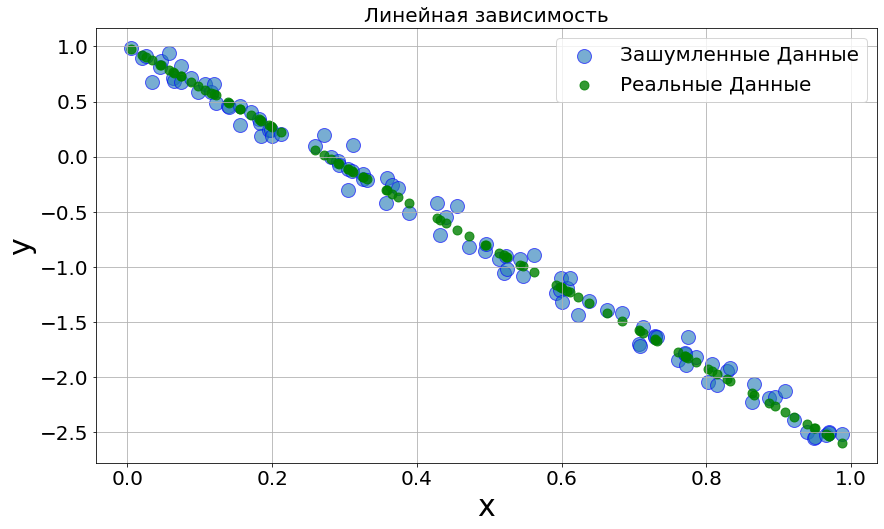

In [9]:
#разброс шума:
noise_power = 0.1

#генерация данных
y_hat, y_true, x = dataset(a = -3.645522, b = 1,
                           f = None,  N = 100,
                           x_max =1, 
                           noise_power = noise_power,
                           seed = 42)

#визуализация сгенирированных данных
vis_data(y_hat, y_true, x, 'Линейная зависимость')

In [10]:
#разбитие данных на тестовые и тренировочные:
X_train, X_test, y_train, y_test = train_test_split(x, y_hat, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(67, 1) (67, 1) (33, 1) (33, 1)


## Линейная регрессия

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
b0 = lr.intercept_
b1 = lr.coef_

In [12]:
b0, b1

(array([0.97861958]), array([[-3.62229935]]))

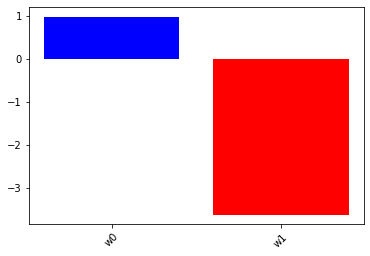

In [13]:
vis_weigths(np.hstack([b0, b1[0]]))

In [14]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict, y_train)}',
      f'\nMSE: {MSE(y_test_predict, y_test)}')

r2_YpTest-YTest: 0.9941263874565305 
r2_YpTrain-YTrain: 0.9920803984244793 
MSE: 0.00668289737467117


r2 близок к 1 - хороший показатель
MSE -> 0

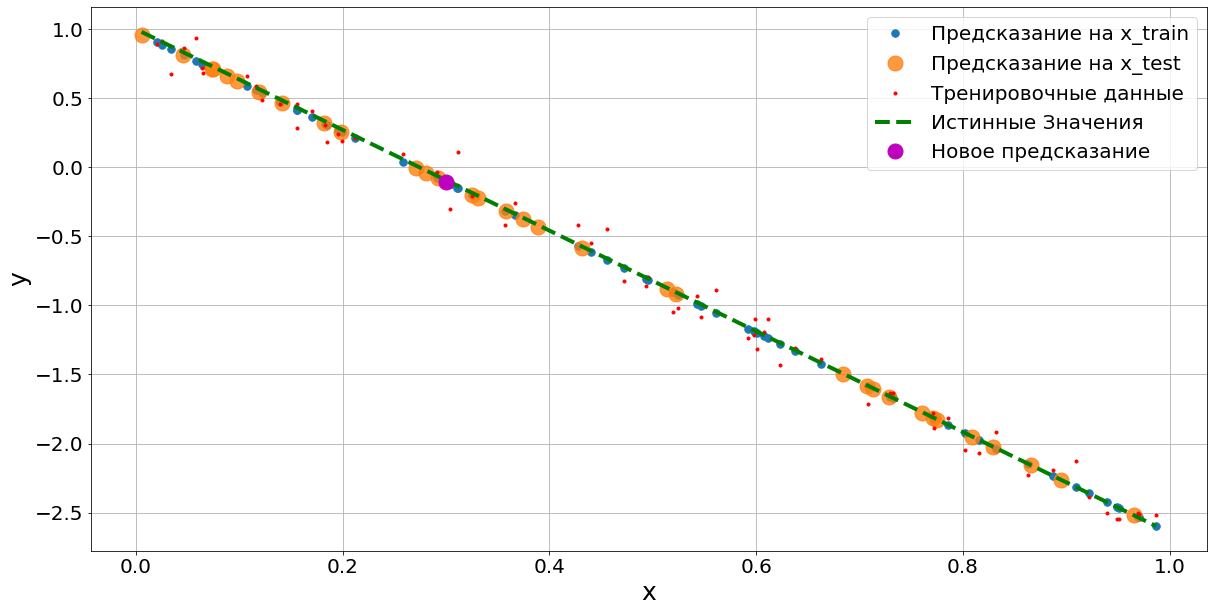

In [15]:
#перед отрисовкой графика добавим новую точку для проверки предсказания:
x_p = [[0.3]]
y_p = lr.predict(x_p)
plot_model_weights(X_train, 
                   y_train, 
                   y_train_predict, 
                   X_test, 
                   y_test_predict, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: Для данной задачи достаточно полинома первой степени**

### * L1

In [16]:
lasso = Lasso(alpha = 0.001)
#Тренируем
lasso.fit(X_train, y_train)
#Тестируем
y_train_predict_l1 = lasso.predict(X_train)
y_test_predict_l1 = lasso.predict(X_test)
l0 = lasso.intercept_
l1 = lasso.coef_

In [17]:
l0, l1

(array([0.97309475]), array([-3.61087324]))

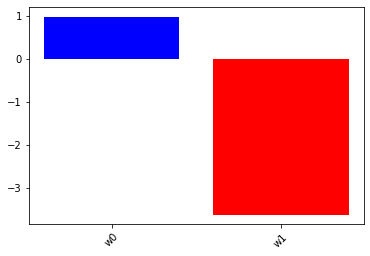

In [18]:
vis_weigths(np.hstack([l0, l1]))

In [19]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_l1, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_l1, y_train)}',
      f'\nMSE: {MSE(y_test_predict_l1, y_test)}')

r2_YpTest-YTest: 0.9940868495078906 
r2_YpTrain-YTrain: 0.9920201849596996 
MSE: 0.006685505322215046


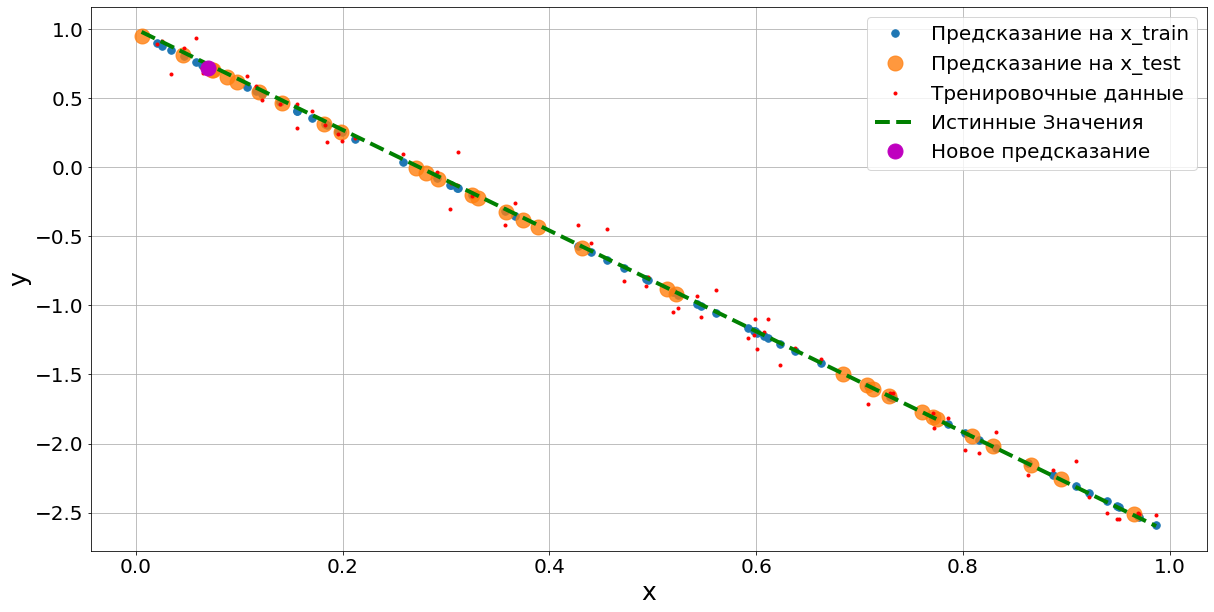

In [20]:
x_p = [[0.07]]
y_p = lasso.predict(x_p)
plot_model_weights(X_train, 
                   y_train, 
                   y_train_predict_l1, 
                   X_test, 
                   y_test_predict_l1, 
                   x, y_true,  
                   x_p, 
                   y_p)

**Вывод: l1 хорошо**

## L2 - Регуляризация Тихонова

In [21]:
ridge = Ridge(alpha=0.001)
#Тренируем
ridge.fit(X_train, y_train)
#Тестируем
y_train_predict_L2 = ridge.predict(X_train)
y_test_predict_L2 = ridge.predict(X_test)
r0 = ridge.intercept_
r1 = ridge.coef_

In [22]:
r0, r1

(array([0.97832093]), array([[-3.62168171]]))

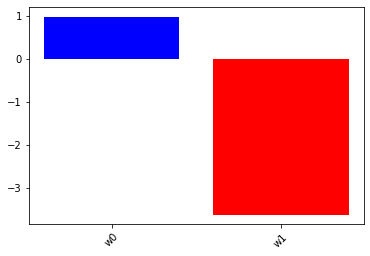

In [23]:
vis_weigths(np.hstack([r0, r1[0]]))

In [24]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_L2, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_L2, y_train)}',
      f'\nMSE: {MSE(y_test_predict_L2, y_test)}')

r2_YpTest-YTest: 0.994124778534821 
r2_YpTrain-YTrain: 0.9920776679092477 
MSE: 0.006682448548570238


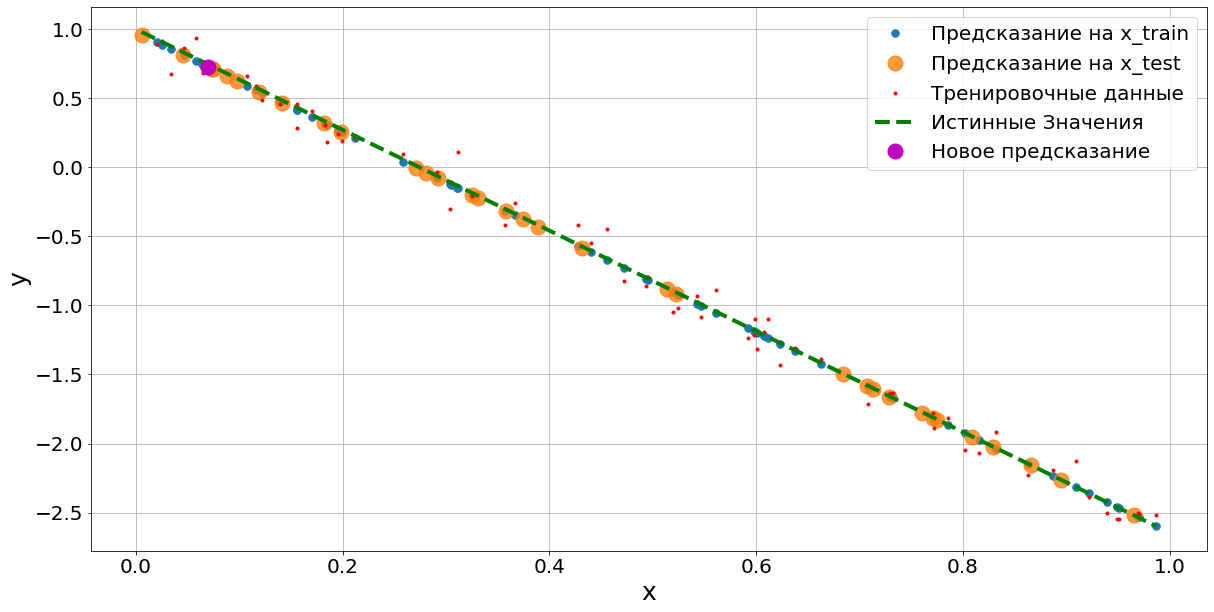

In [25]:
x_p = [[0.07]]
y_p = ridge.predict(x_p)
plot_model_weights(X_train, 
                   y_train, 
                   y_train_predict_L2, 
                   X_test, 
                   y_test_predict_L2, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: l2 хорошо**

## Эластичная регуляризация

In [26]:
en = ElasticNet(alpha=0.001,
                l1_ratio=0.5, 
                fit_intercept=True, 
                normalize='deprecated', 
                precompute=False, 
                max_iter=300, 
                copy_X=True, 
                tol=0.0001, 
                warm_start=False, 
                positive=False, 
                random_state=None, 
                selection='cyclic')

#Тренируем
en.fit(X_train, y_train)
#Тестируем
y_train_predict_en = en.predict(X_train)
y_test_predict_en = en.predict(X_test)
en0 = en.intercept_
en1 = en.coef_

In [27]:
en0, en1

(array([0.96592342]), array([-3.59604191]))

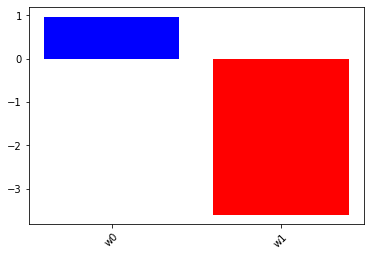

In [28]:
vis_weigths(np.hstack([en0, en1]))

In [29]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_en, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_en, y_train)}',
      f'\nMSE: {MSE(y_test_predict_en, y_test)}')

r2_YpTest-YTest: 0.9940042712993098 
r2_YpTrain-YTrain: 0.991911006364849 
MSE: 0.006723296796816625


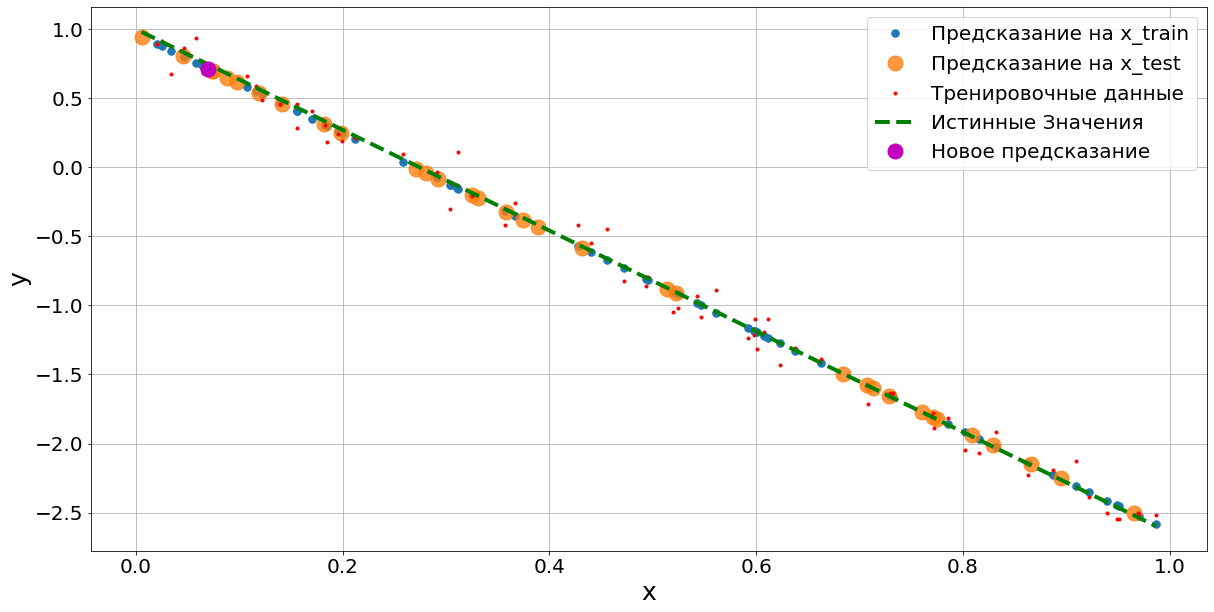

In [30]:
x_p = [[0.07]]
y_p = en.predict(x_p)
plot_model_weights(X_train, 
                   y_train, 
                   y_train_predict_en, 
                   X_test, 
                   y_test_predict_en, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: Эластичная хорошо**

## б) Полиномиальная зависимость

## Описание зависимости

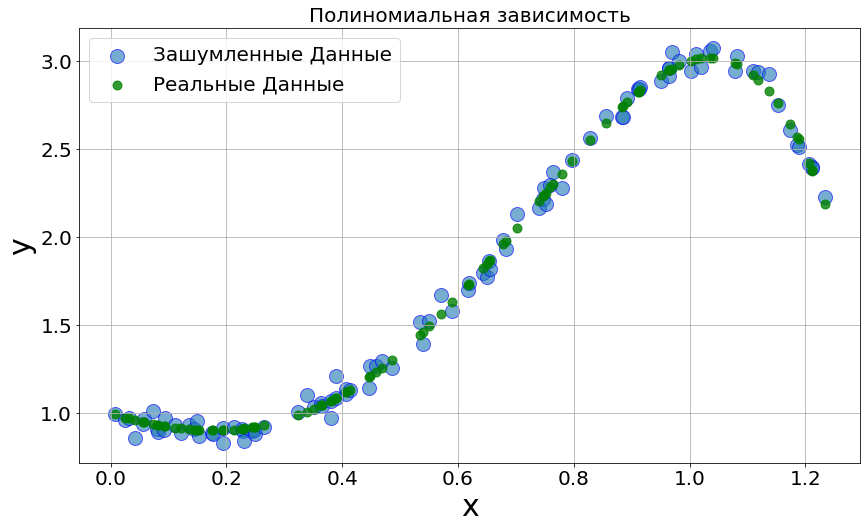

In [31]:
noise_power = 0.05

y_hat, y_true, x = dataset(a = [-1, 2, 3, 1, -3], b = 1,
                       f = None,  N = 100,
                       x_max =1.25, 
                       noise_power = noise_power,
                       seed = 42)

vis_data(y_hat, y_true,x, 'Полиномиальная зависимость')

In [32]:
#Разбиение данных на тестовые и тренировочные
X_train, X_test, y_train, y_test = train_test_split(x, y_hat, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(67, 1) (67, 1) (33, 1) (33, 1)


## Линейная регрессия

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
b0 = lr.intercept_
b1 = lr.coef_

In [34]:
b0, b1

(array([0.59587464]), array([[1.97394232]]))

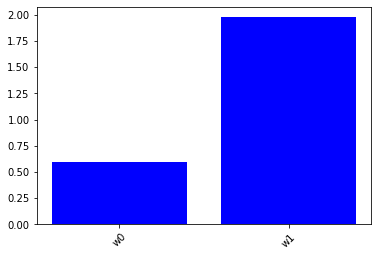

In [35]:
vis_weigths(np.hstack([b0, b1[0]]))

In [36]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict, y_train)}',
      f'\nMSE: {MSE(y_test_predict, y_test)}')

r2_YpTest-YTest: 0.8249618390829047 
r2_YpTrain-YTrain: 0.8511427198930489 
MSE: 0.09240862422652094


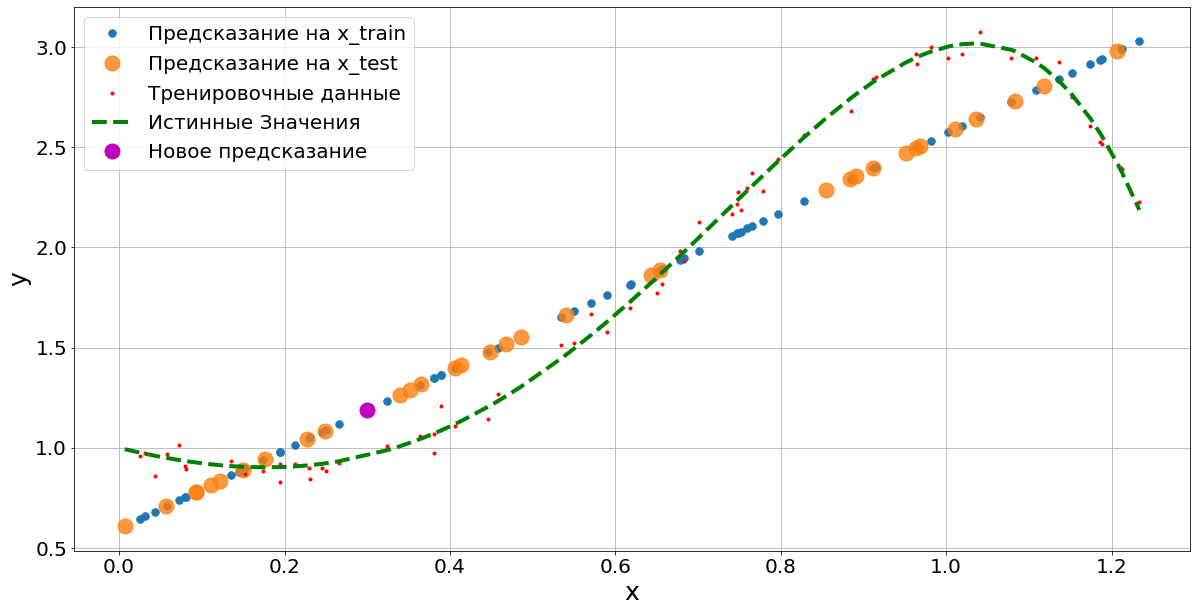

In [37]:
#Перед отрисовкой графика добавим новую точку для проверки предсказания
x_p = [[0.3]]
y_p = lr.predict(x_p)
plot_model_weights(X_train, 
                   y_train, 
                   y_train_predict, 
                   X_test, 
                   y_test_predict, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: Не плохо, но можно попробовать полиномную модель**


## Полиномная регрессия

 degree: 2, r2: 0.8757216280162764, MSE: 0.08218628979306672
 degree: 3, r2: 0.9832308683050701, MSE: 0.01108956204574441
 degree: 4, r2: 0.9966014913689866, MSE: 0.0022474611692635273
 degree: 5, r2: 0.9969529770975971, MSE: 0.002015020821931885
 degree: 6, r2: 0.9969533254600432, MSE: 0.0020147904470364554
 degree: 7, r2: 0.9970107245191339, MSE: 0.0019768319862924376
 degree: 8, r2: 0.9970108795147165, MSE: 0.001976729486463473
 degree: 9, r2: 0.9970284041253741, MSE: 0.0019651403200862056
 degree: 10, r2: 0.9971423928314428, MSE: 0.0018897586693567476
 degree: 11, r2: 0.9971426204620261, MSE: 0.001889608135416005


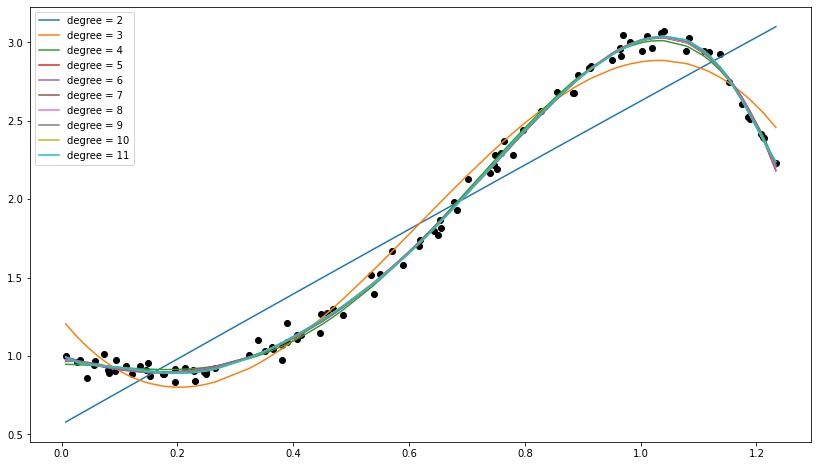

In [38]:
#Графическая и коэфицентная оценка степени полинома
calculate_degree(x, y_hat)

**Исходя из графика и значений R2 и MSE, выберем 4 степень полинома**

In [39]:
pf = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = pf.fit_transform(x) 

In [40]:
#Разбиение данных на тестовые и тренировочные с учетом полинома
X_train_, X_test_, y_train, y_test = train_test_split(X_poly, y_hat, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(67, 1) (67, 1) (33, 1) (33, 1)


In [41]:
lr = LinearRegression()
lr.fit(X_train_, y_train)
y_train_predict = lr.predict(X_train_)
y_test_predict = lr.predict(X_test_)
b0 = lr.intercept_
b1 = lr.coef_

In [42]:
b0, b1

(array([1.2256764]), array([[-4.50987968, 13.32782071, -7.19788101]]))

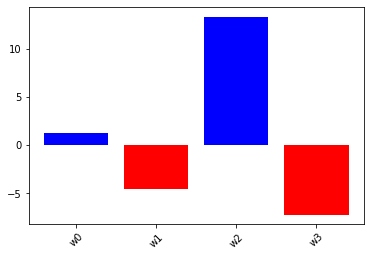

In [43]:
vis_weigths(np.hstack([b0, b1[0]]))

In [44]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict, y_train)}',
      f'\nMSE: {MSE(y_test_predict, y_test)}')

r2_YpTest-YTest: 0.9805781300468573 
r2_YpTrain-YTrain: 0.9826125043540324 
MSE: 0.013392044275107793


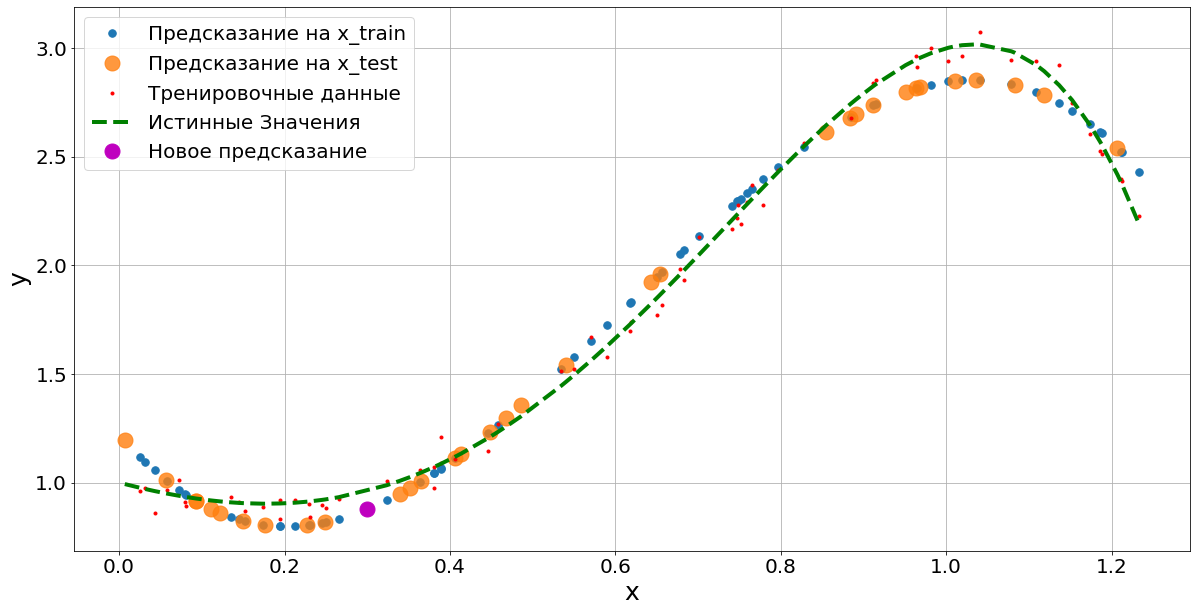

In [45]:
#перед отрисовкой графика добавим новую точку для проверки предсказания:
x_p = [[0.3]]
y_p = lr.predict(pf.transform(x_p))
plot_model_weights(X_train_, 
                   y_train, 
                   y_train_predict, 
                   X_test_, 
                   y_test_predict, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: Подходит полином 4 степени, замечательные показатели R2 и MSE**

## L1

In [46]:
lasso = Lasso(alpha = 0.001)
#Тренируем
lasso.fit(X_train_, y_train)
#Тестируем
y_train_predict_l1 = lasso.predict(X_train_)
y_test_predict_l1 = lasso.predict(X_test_)
l0 = lasso.intercept_
l1 = lasso.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.940e-02, tolerance: 4.101e-03
  model = cd_fast.enet_coordinate_descent(


In [47]:
l0, l1

(array([0.85360696]), array([-1.13210216,  6.89099176, -3.89292303]))

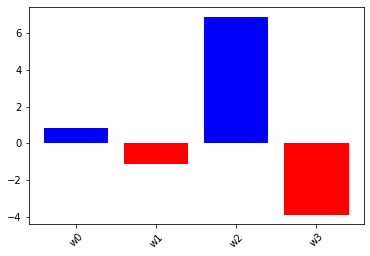

In [48]:
vis_weigths(np.hstack([l0, l1]))

In [49]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_l1, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_l1, y_train)}',
      f'\nMSE: {MSE(y_test_predict_l1, y_test)}')

r2_YpTest-YTest: 0.9427641973000618 
r2_YpTrain-YTrain: 0.9550892671809947 
MSE: 0.0350187104358172


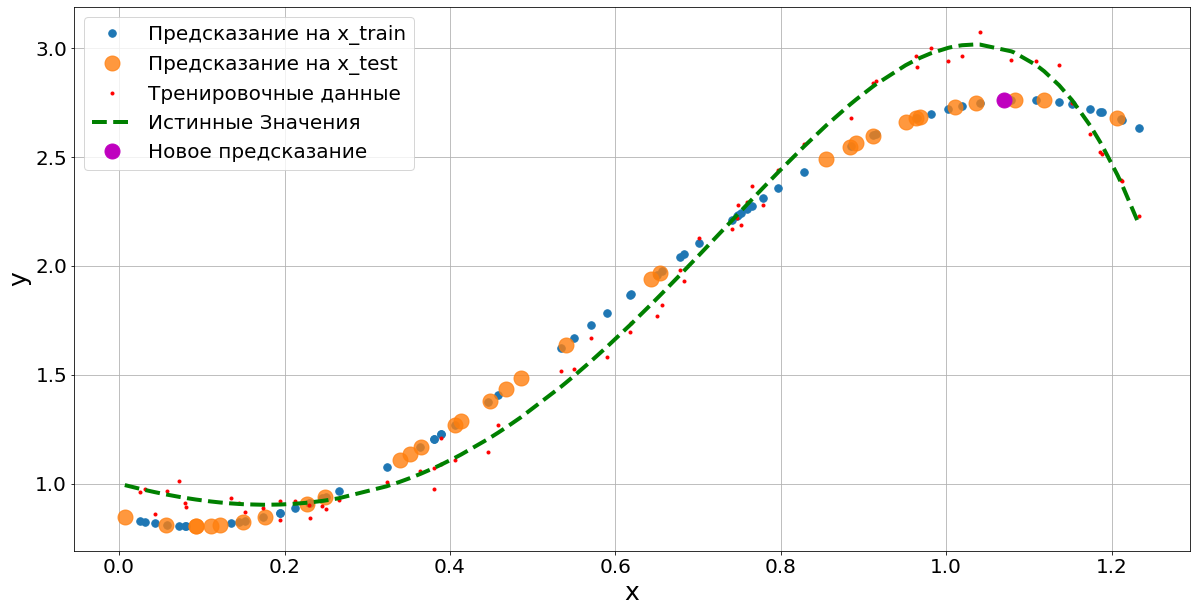

In [50]:
x_p = [[1.07]]
y_p = lasso.predict(pf.transform(x_p))
plot_model_weights(X_train_, 
                   y_train, 
                   y_train_predict_l1, 
                   X_test_, 
                   y_test_predict_l1, 
                   x, y_true,  
                   x_p, 
                   y_p)

**Вывод: Модель 4 поленома лучше чем L2**

## L2 - Регуляризация Тихонова

In [51]:
ridge = Ridge(alpha=0.001)
#Тренируем
ridge.fit(X_train_, y_train)
#Тестируем
y_train_predict_L2 = ridge.predict(X_train_)
y_test_predict_L2 = ridge.predict(X_test_)
r0 = ridge.intercept_
r1 = ridge.coef_

In [52]:
r0, r1

(array([1.18222606]), array([[-4.11018269, 12.56116508, -6.80273555]]))

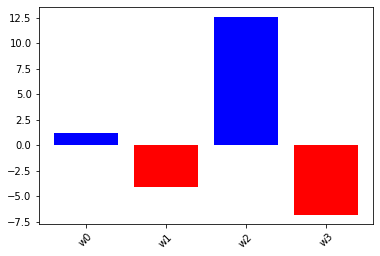

In [53]:
vis_weigths(np.hstack([r0, r1[0]]))

In [54]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_L2, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_L2, y_train)}',
      f'\nMSE: {MSE(y_test_predict_L2, y_test)}')

r2_YpTest-YTest: 0.9792227701524718 
r2_YpTrain-YTrain: 0.9820633579435398 
MSE: 0.014086983960189923


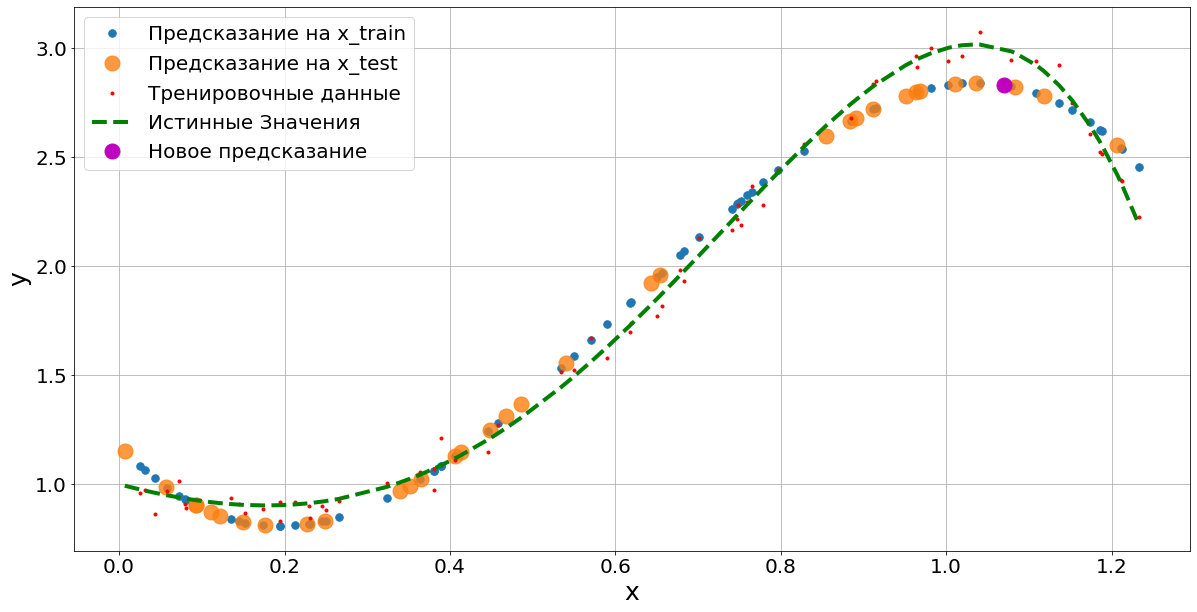

In [55]:
x_p = [[1.07]]
y_p = ridge.predict(pf.fit_transform(x_p))
plot_model_weights(X_train_,
                   y_train,
                   y_train_predict_L2,
                   X_test_,
                   y_test_predict_L2,
                   x,
                   y_true,
                   x_p,
                   y_p)

**Вывод: Модель 4 поленома лучше чем L2**

## Эластичная регуляризация

In [56]:
en = ElasticNet(alpha=0.001,
                l1_ratio=0.5, 
                fit_intercept=True, 
                normalize='deprecated', 
                precompute=False, 
                max_iter=300, 
                copy_X=True, 
                tol=0.0001, 
                warm_start=False, 
                positive=False, 
                random_state=None, 
                selection='cyclic')

#Тренируем
en.fit(X_train_, y_train)
#Тестируем
y_train_predict_en = en.predict(X_train_)
y_test_predict_en = en.predict(X_test_)
en0 = en.intercept_
en1 = en.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.423e-01, tolerance: 4.101e-03
  model = cd_fast.enet_coordinate_descent(


In [57]:
en0, en1

(array([0.69426921]), array([ 0.49389649,  3.61293832, -2.15316101]))

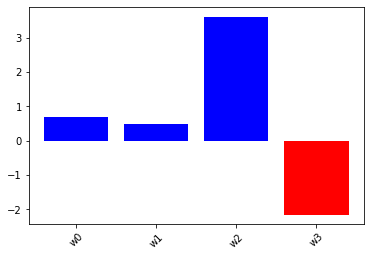

In [58]:
vis_weigths(np.hstack([en0, en1]))

In [59]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_en, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_en, y_train)}',
      f'\nMSE: {MSE(y_test_predict_en, y_test)}')

r2_YpTest-YTest: 0.8962183960179015 
r2_YpTrain-YTrain: 0.9185404531104511 
MSE: 0.05939593265849439


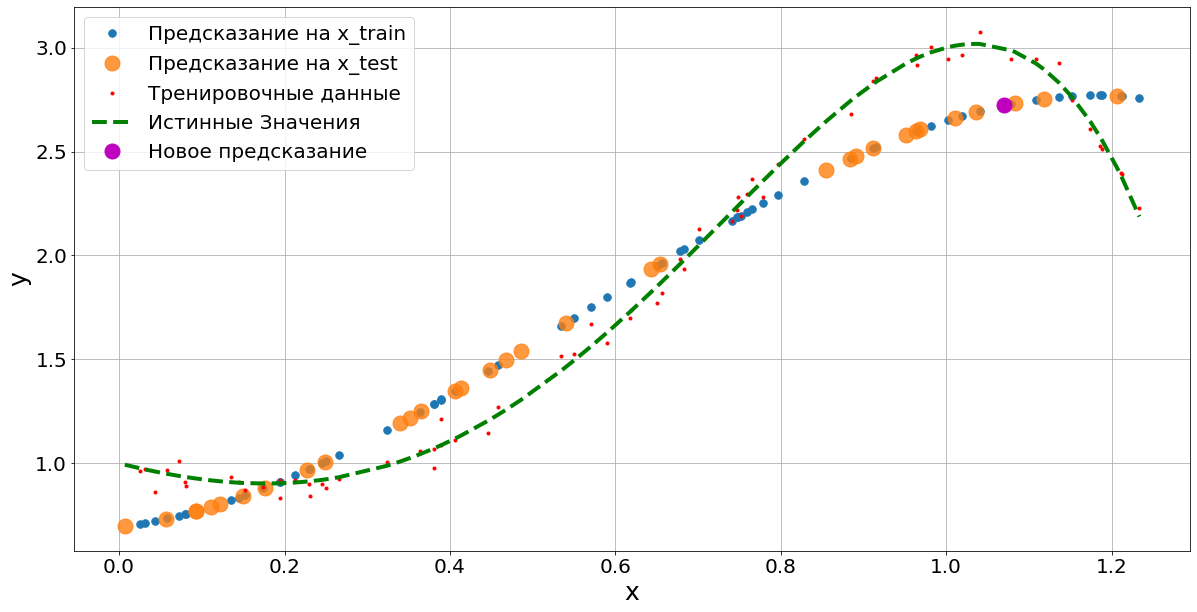

In [60]:
x_p = [[1.07]]
y_p = en.predict(pf.transform(x_p))
plot_model_weights(X_train_, 
                   y_train, 
                   y_train_predict_en, 
                   X_test_, 
                   y_test_predict_en, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: Модель 4 поленома лучше чем Эластичная**

## в) Гармонические данные

## Описание зависимости

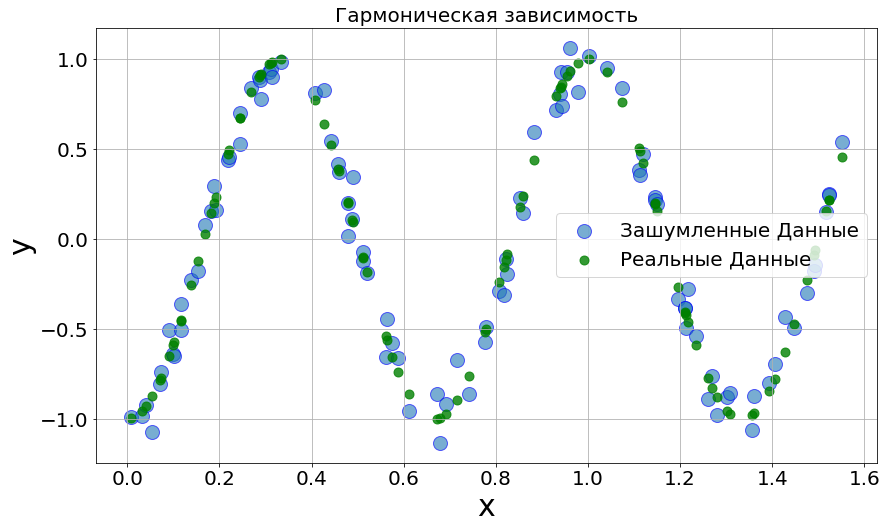

In [61]:
y_hat, y_true, x = dataset(a = 3*np.pi, 
                           b = np.pi, 
                           f = np.cos, 
                           N = 100, 
                           x_max =np.pi/2, 
                           noise_power = 0.1, 
                           seed = 42) 
vis_data(y_hat, y_true,x, 'Гармоническая зависимость')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y_hat, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(67, 1) (67, 1) (33, 1) (33, 1)


## Линейная регрессия

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
b0 = lr.intercept_
b1 = lr.coef_

In [64]:
b0, b1

(array([0.08167714]), array([[-0.09277176]]))

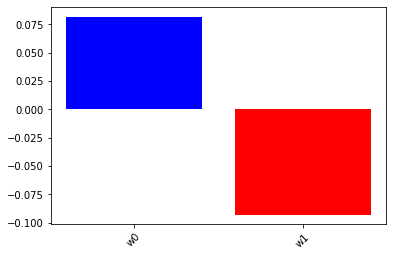

In [65]:
vis_weigths(np.hstack([b0, b1[0]]))

In [66]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict, y_train)}',
      f'\nMSE: {MSE(y_test_predict, y_test)}')

r2_YpTest-YTest: -201.27657154691235 
r2_YpTrain-YTrain: -233.76705062503785 
MSE: 0.37248413489673127


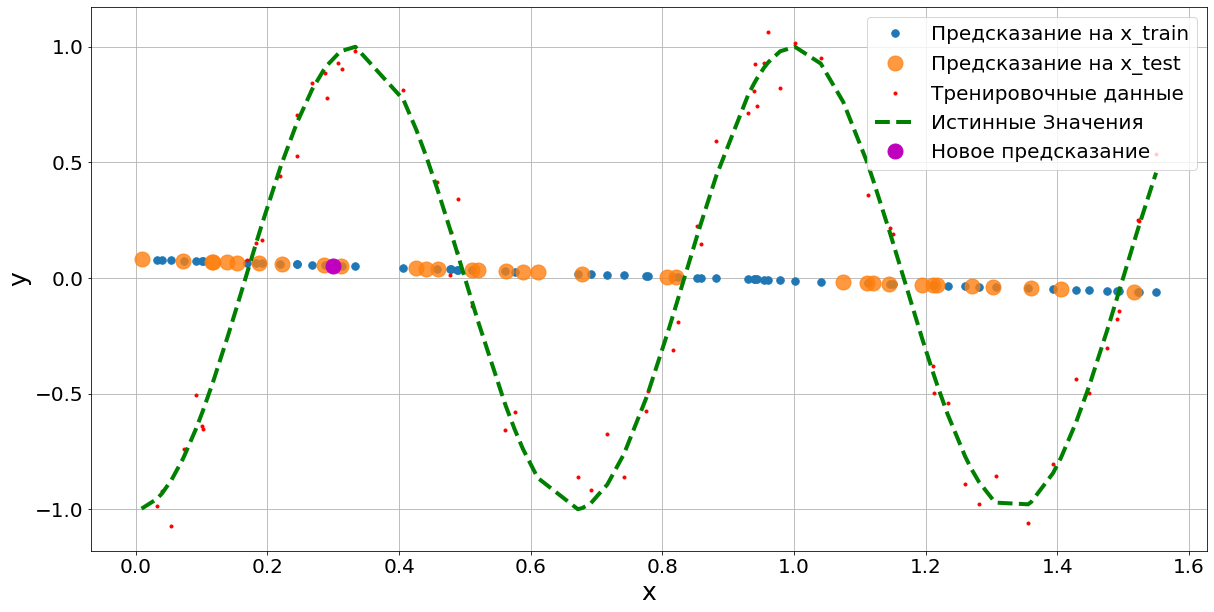

In [67]:
#Перед отрисовкой графика добавим новую точку для проверки предсказания
x_p = [[0.3]]
y_p = lr.predict(x_p)
plot_model_weights(X_train,
                   y_train,
                   y_train_predict,
                   X_test,
                   y_test_predict,
                   x,
                   y_true,
                   x_p,
                   y_p)

**Вывод: Все плохо, необходимо полиномиальная модель**

## Полиномная регрессия

 degree: 2, r2: 0.07256857772362169, MSE: 0.38457965313334197
 degree: 3, r2: 0.133355177509067, MSE: 0.35937316465437463
 degree: 4, r2: 0.17078382403790315, MSE: 0.3438525605929126
 degree: 5, r2: 0.5823270632345979, MSE: 0.17319718664498157
 degree: 6, r2: 0.7188234935194566, MSE: 0.11659596681134192
 degree: 7, r2: 0.9249947136976223, MSE: 0.031102576747436675
 degree: 8, r2: 0.9559645746591061, MSE: 0.0182602488943203
 degree: 9, r2: 0.9775722956160702, MSE: 0.009300136447154468
 degree: 10, r2: 0.9813458742890305, MSE: 0.007735339803154229
 degree: 11, r2: 0.9818861064264649, MSE: 0.007511320772705547


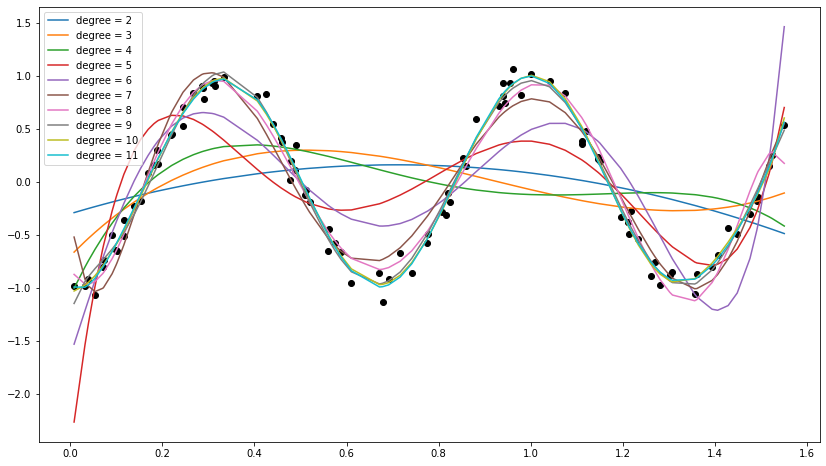

In [68]:
#Графическая и коэфицентная оценка степени полинома
calculate_degree(x, y_hat)

**Исходя из графика и значений R2 и MSE, выберем 10-й полином**

In [69]:
pf = PolynomialFeatures(degree = 10, include_bias=False)
X_poly = pf.fit_transform(x) 

In [70]:
#Разбиение данных на тестовые и тренировочные с учетом полинома
X_train_, X_test_, y_train, y_test = train_test_split(X_poly, y_hat, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(67, 1) (67, 1) (33, 1) (33, 1)


In [71]:
lr = LinearRegression()
lr.fit(X_train_, y_train)
y_train_predict = lr.predict(X_train_)
y_test_predict = lr.predict(X_test_)
b0 = lr.intercept_
b1 = lr.coef_

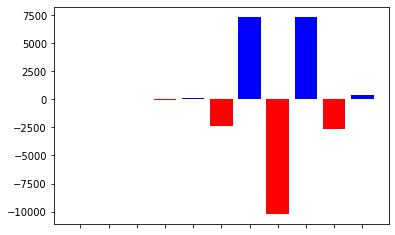

In [72]:
vis_weigths(np.hstack([b0, b1[0]]))

In [73]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict, y_train)}',
      f'\nMSE: {MSE(y_test_predict, y_test)}')

r2_YpTest-YTest: 0.9769449836331852 
r2_YpTrain-YTrain: 0.9808239902743091 
MSE: 0.007771330206642321


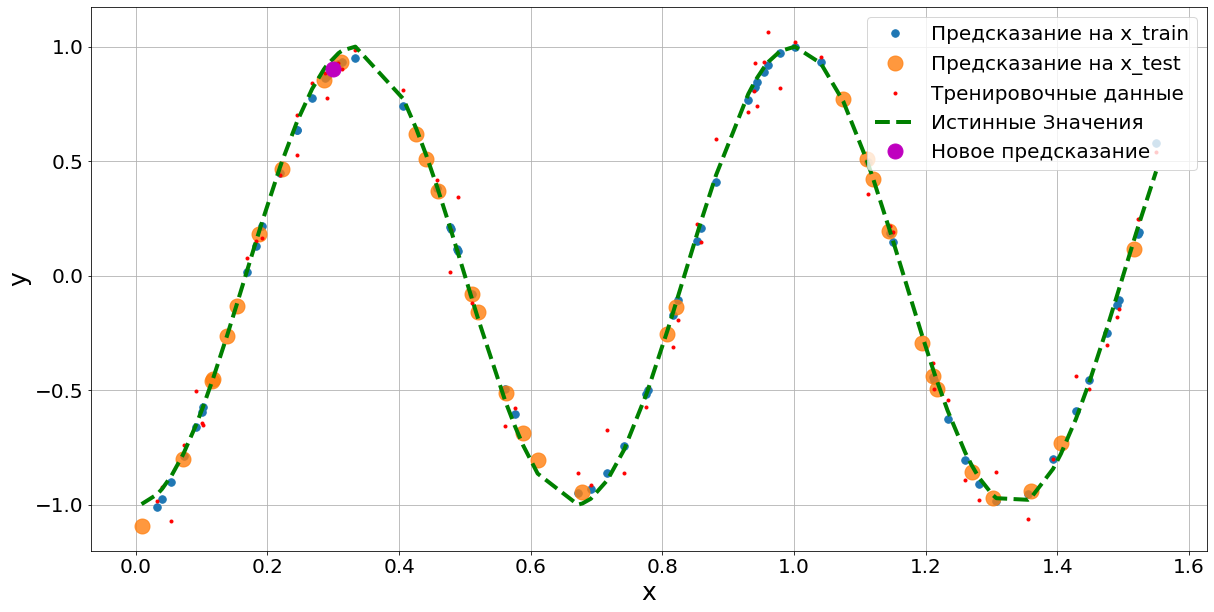

In [74]:
#Перед отрисовкой графика добавим новую точку для проверки предсказания
x_p = [[0.3]]
y_p = lr.predict(pf.transform(x_p))
plot_model_weights(X_train_,
                   y_train,
                   y_train_predict,
                   X_test_,
                   y_test_predict,
                   x, y_true,
                   x_p,
                   y_p)


**Вывод: Подходит полином 10 степени, замечательные показатели R2 и MSE**

## L1

In [75]:
lasso = Lasso(alpha = 0.001)
#Тренируем
lasso.fit(X_train_, y_train)
#Тестируем
y_train_predict_l1 = lasso.predict(X_train_)
y_test_predict_l1 = lasso.predict(X_test_)
l0 = lasso.intercept_
l1 = lasso.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.620e+00, tolerance: 2.936e-03
  model = cd_fast.enet_coordinate_descent(


In [76]:
l0, l1

(array([-0.20168903]),
 array([ 0.65297511, -0.38369624,  1.0229139 ,  0.17853194, -0.61846204,
        -0.43770444, -0.13197123,  0.00287204,  0.07992347,  0.07610805]))

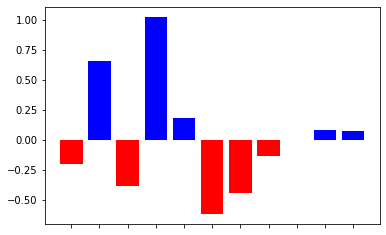

In [77]:
vis_weigths(np.hstack([l0, l1]))

In [78]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_l1, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_l1, y_train)}',
      f'\nMSE: {MSE(y_test_predict_l1, y_test)}')

r2_YpTest-YTest: -3.8602151364925223 
r2_YpTrain-YTrain: -3.184997860946888 
MSE: 0.33108790436964763


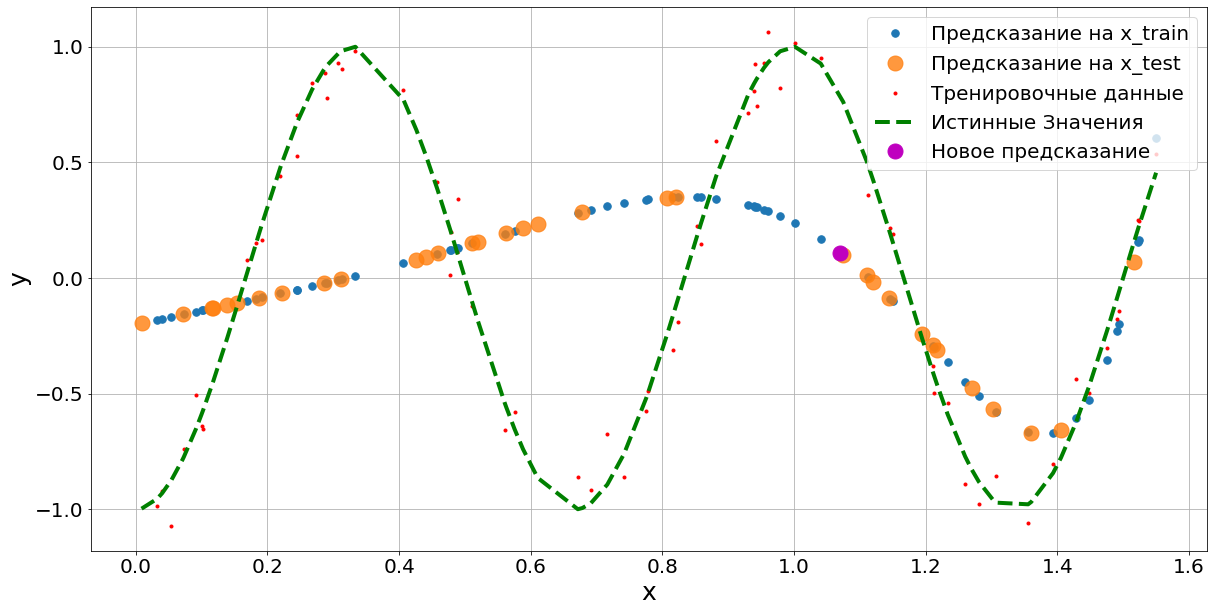

In [79]:
x_p = [[1.07]]
y_p = lasso.predict(pf.transform(x_p))
plot_model_weights(X_train_, 
                   y_train, 
                   y_train_predict_l1, 
                   X_test_, 
                   y_test_predict_l1, 
                   x, y_true,  
                   x_p, 
                   y_p)

Вывод: l1 плохо

## L2 - Регуляризация Тихонова

In [80]:
ridge = Ridge(alpha=0.001)
#Тренируем
ridge.fit(X_train_, y_train)
#Тестируем
y_train_predict_L2 = ridge.predict(X_train_)
y_test_predict_L2 = ridge.predict(X_test_)
r0 = ridge.intercept_
r1 = ridge.coef_

In [81]:
r0, r1

(array([-1.63445876]),
 array([[ 16.92496872, -35.47764966,   1.74680094,  26.06561001,
          16.03041643,  -9.38818983, -22.83361908,  -7.16435086,
          24.07847175,  -7.77924582]]))

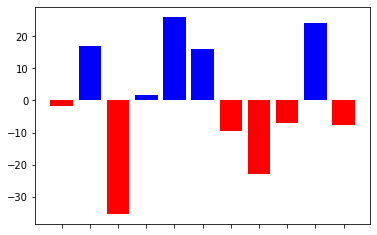

In [82]:
vis_weigths(np.hstack([r0, r1[0]]))

In [83]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_L2, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_L2, y_train)}',
      f'\nMSE: {MSE(y_test_predict_L2, y_test)}')

r2_YpTest-YTest: 0.5141038018268059 
r2_YpTrain-YTrain: 0.5583630551387558 
MSE: 0.10659461608314197


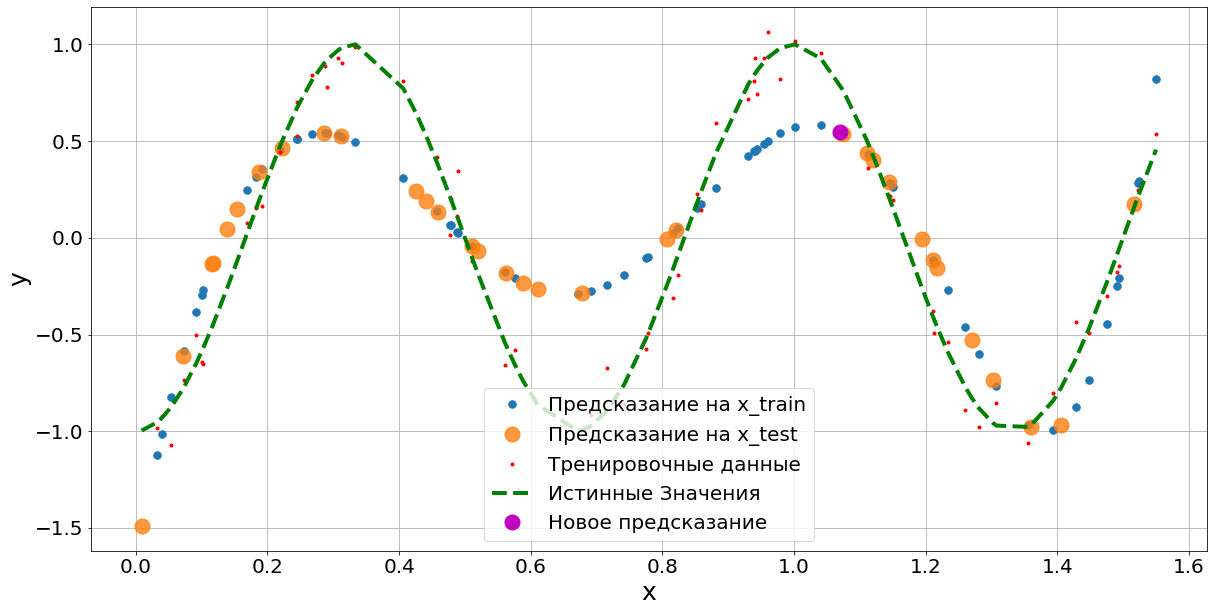

In [84]:
x_p = [[1.07]]
y_p = ridge.predict(pf.fit_transform(x_p))
plot_model_weights(X_train_,
                   y_train,
                   y_train_predict_L2,
                   X_test_,
                   y_test_predict_L2,
                   x,
                   y_true,
                   x_p,
                   y_p)

Вывод: l2 не плохо

## Эластичная регуляризация

In [85]:
en = ElasticNet(alpha=0.001,
                l1_ratio=0.5, 
                fit_intercept=True, 
                normalize='deprecated', 
                precompute=False, 
                max_iter=300, 
                copy_X=True, 
                tol=0.0001, 
                warm_start=False, 
                positive=False, 
                random_state=None, 
                selection='cyclic')

#Тренируем
en.fit(X_train_, y_train)
#Тестируем
y_train_predict_en = en.predict(X_train_)
y_test_predict_en = en.predict(X_test_)
en0 = en.intercept_
en1 = en.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+01, tolerance: 2.936e-03
  model = cd_fast.enet_coordinate_descent(


In [86]:
en0, en1

(array([-0.32228636]),
 array([ 1.16759361,  0.00223016,  0.03894111, -0.35768619, -0.31764831,
        -0.13874023, -0.02167485,  0.02985641,  0.04223943,  0.03659005]))

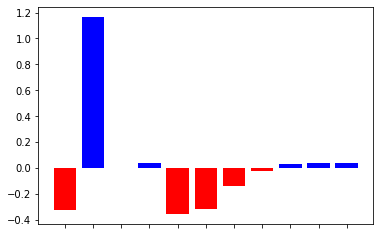

In [87]:
vis_weigths(np.hstack([en0, en1]))

In [88]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_en, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_en, y_train)}',
      f'\nMSE: {MSE(y_test_predict_en, y_test)}')

r2_YpTest-YTest: -3.491132707713378 
r2_YpTrain-YTrain: -3.5555047947034524 
MSE: 0.34765317389108835


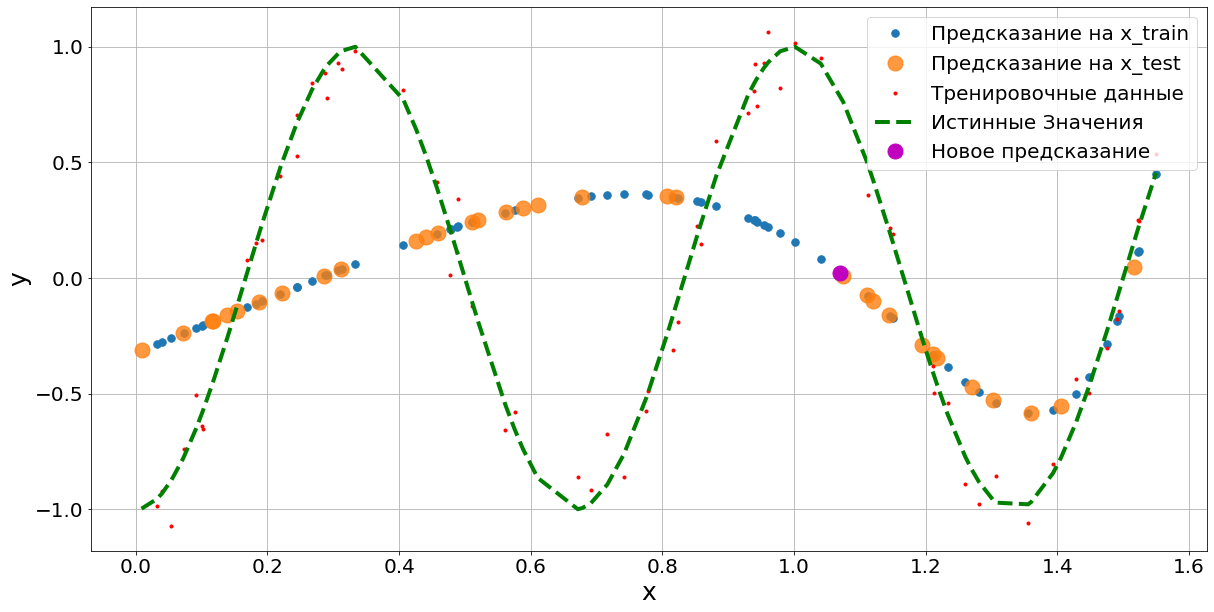

In [89]:
x_p = [[1.07]]
y_p = en.predict(pf.transform(x_p))
plot_model_weights(X_train_, 
                   y_train, 
                   y_train_predict_en, 
                   X_test_, 
                   y_test_predict_en, 
                   x, 
                   y_true,  
                   x_p, 
                   y_p)

**Вывод: эластичная - плохо

# 2. Для набора данных Cars Moldova:

 - Скачайте набор данных Cars Moldova (сразу очищенных от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1»).
 - Используйте любую из подготовленных вами моделей линейной регрессии для предсказания цены автомобилей на вторичном рынке Молдавии. Оцените модель на отложенной выборке.
 - Оцените влияние разных типов предварительной обработки на результат (использование стандартизации, нормализации или степенного преобразования для числовых признаков).
 - Сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с помощью one-hot кодирования.
 - Оцените наиболее значимые признаки для модели проанализировав веса.

## а) Данные только с числовыми признаками

### Подключение файлов

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
#df = pd.read_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/2/data/cars_moldova_cat_num.csv', delimiter = ',')
df = pd.read_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/2/date/cars_moldova_clean-v2.csv', delimiter = ',')


### Обработка данных

In [92]:
df = df.drop(columns = ['Price_Ru']).copy()

In [93]:
cat_columns = []
num_columns = []
for column_name in df.columns:
  if (df[column_name].dtypes == object):
    cat_columns +=[column_name]
  else:
    num_columns +=[column_name]

In [94]:
df_num = df[num_columns].copy()

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             32074 non-null  int64  
 1   Distance         32074 non-null  float64
 2   Engine_capacity  32074 non-null  float64
 3   Price_euro       32074 non-null  float64
 4   km_year          32074 non-null  float64
 5   Nalog_cof        32074 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.5 MB


In [95]:
#из датафрейм удалить столбец Цены и его значения и присвоить их y, а остальные матрице X:
X_df,y_df = df_num.drop(columns = ['Price_euro']).values,df_num['Price_euro'].values

In [96]:
features_names = df_num.drop(columns = ['Price_euro']).columns

features_names

Index(['Year', 'Distance', 'Engine_capacity', 'km_year', 'Nalog_cof'], dtype='object')

In [97]:
#производим разбиение на тренировочную и тестовую выборку(30%) и фиксируем случ.состояние (42):
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [98]:
def forward(weights, inputs): #весы и некие значения Х
    return inputs.dot(weights.T) #матричное произведение интутов на транспонированные весы

def loss_func(predicts, labels): #предсказанные и истенные значения
        return np.square(predicts - labels)  

decline: [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5], 
yhat: [ 3875.  4650.  5425.  6200.  6975.  7750.  8525.  9300. 10075. 10850.
 11625.], 
y[0]: 7750.0, 
loss: [15015625.          9610000.          5405625.          2402500.
   600625.                0.           600625.          2402500.00000001
  5405625.          9610000.         15015625.        ]


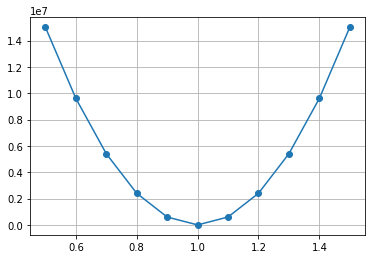

In [99]:
#при помоши графика проверим что наша функция квадратичная:
decline = np.linspace(start = 0.5, stop = 1.5,num = 11)
yhat = decline* y_df[0]
loss = loss_func(yhat, y_df[0])
plt.plot(decline,loss,'-o'); plt.grid(); 
print(f'decline: {decline}, \nyhat: {yhat}, \ny[0]: {y_df[0]}, \nloss: {loss}')

### Предварительная обработка - Нормализация

In [ ]:
X_train

In [100]:
#проводим нормализацию для компенсации масштаба тренировочных данных:
scaler_mm = MinMaxScaler()
X_train_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

In [101]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_mm, y_train)
y_train_predict_mm = lr.predict(X_train_scaled_mm)
y_test_predict_mm = lr.predict(X_test_scaled_mm)
b0 = lr.intercept_
b1 = lr.coef_

In [102]:
b0, b1

(0.0,
 array([  7867.7941661 , -26340.95160215,  18929.31642032,  20188.78801156,
          7239.25683296]))

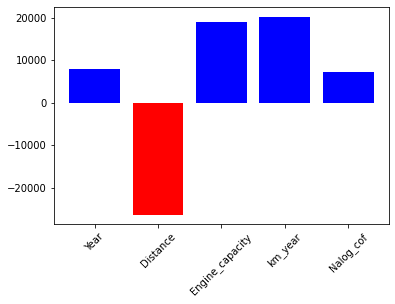

In [103]:
vis_weigths(np.hstack([b1]), features_names)

In [104]:
np.sum(np.abs(b1))

80566.10703308508

In [105]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_mm, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_mm, y_train)}',
      f'\nMSE: {MSE(y_test_predict_mm, y_test)}')

r2_YpTest-YTest: -0.41161289464684336 
r2_YpTrain-YTrain: -0.2744775803634698 
MSE: 52008376.63542785


In [150]:
X_train_scaled_mm

array([[0.74      , 0.72994599, 0.41666667, ..., 1.        , 0.        ,
        0.        ],
       [0.56      , 0.63392679, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.92      , 0.31446289, 0.27083333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.7       , 0.57236047, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.7       , 0.58191638, 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.24      , 0.57991598, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [151]:
y_train

array([10000.,  5500., 12390., ...,  5999.,  4850.,  1000.])

In [152]:
y_train_predict_mm

array([10166.625, 12062.125, 14340.25 , ...,  7120.125,  3618.875,
       -3500.375])

In [153]:
X_test_scaled_mm

array([[0.46      , 0.59991998, 0.54166667, ..., 0.        , 0.        ,
        1.        ],
       [0.84      , 0.24756751, 0.3725    , ..., 0.        , 0.        ,
        1.        ],
       [0.72      , 0.37387477, 0.27083333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.84      , 0.58561712, 0.41666667, ..., 1.        , 0.        ,
        0.        ],
       [0.74      , 0.51990398, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.68      , 0.37987598, 0.47916667, ..., 0.        , 0.        ,
        1.        ]])

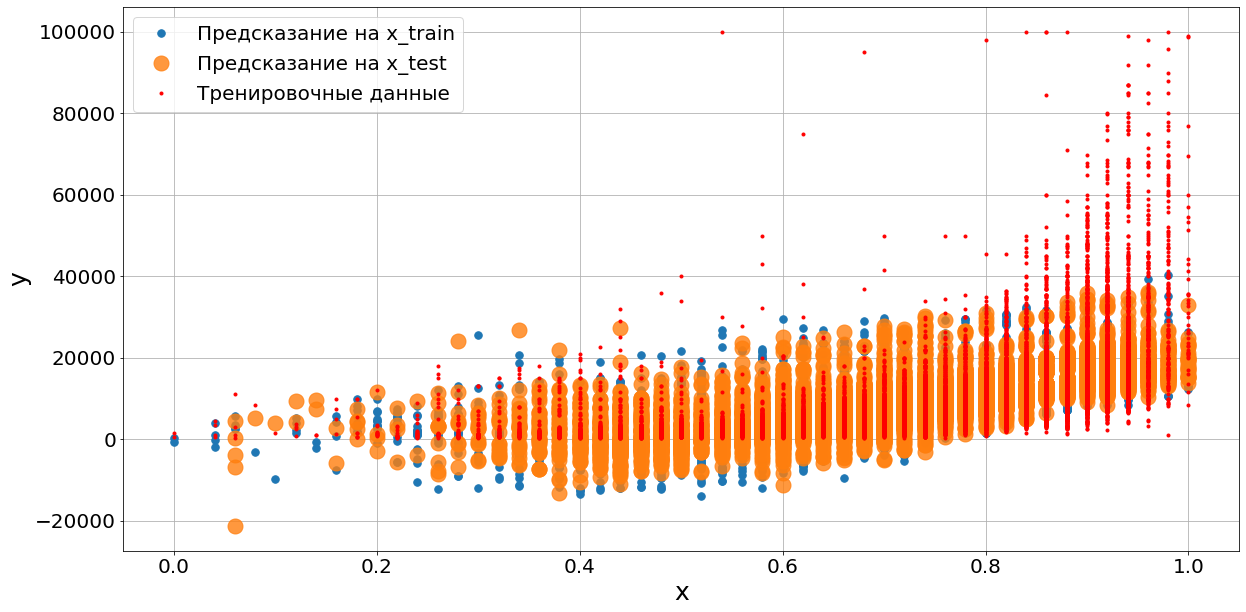

In [106]:
plot_model_weights(X_train_scaled_mm, 
                    y_train, 
                    y_train_predict_mm, 
                    X_test_scaled_mm, 
                    y_test_predict_mm
                  )

### Предварительная обработка - Стандартизация

In [107]:
#проводим стандартизацию для компенсации масштаба тренировочных данных:
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train)
X_test_scaled_s = scaler_s.transform(X_test)

In [108]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_s, y_train)
y_train_predict_s = lr.predict(X_train_scaled_s)
y_test_predict_s = lr.predict(X_test_scaled_s)
b0 = lr.intercept_
b1 = lr.coef_

In [109]:
b0, b1

(0.0, array([ 3720.3266164 , -2541.14972103,  3495.30447909,  1118.44408228,
          380.25593307]))

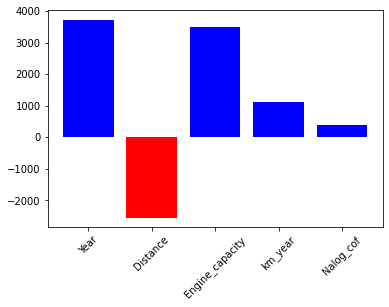

In [110]:
vis_weigths(np.hstack([b1]), features_names)

In [111]:
np.sum(np.abs(b1))

11255.48083187082

In [112]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_s, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_s, y_train)}',
      f'\nMSE: {MSE(y_test_predict_s, y_test)}')

r2_YpTest-YTest: -2.2570388738422675 
r2_YpTrain-YTrain: -2.110659011841032 
MSE: 139307029.60898048


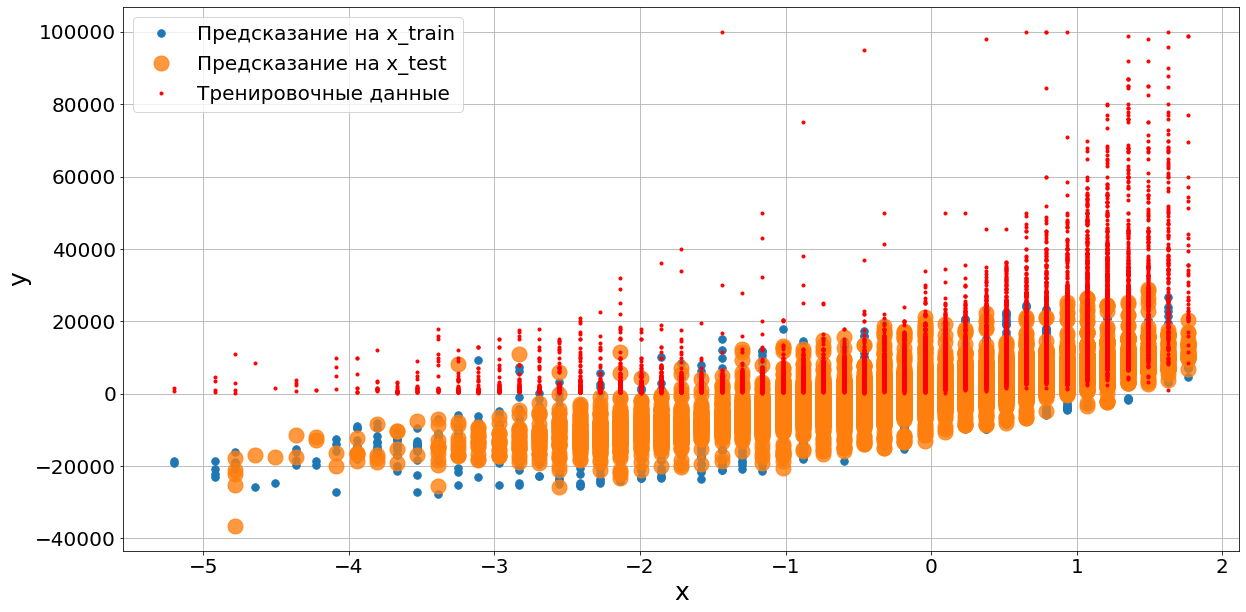

In [113]:
plot_model_weights(X_train_scaled_s, 
                  y_train, 
                  y_train_predict_s, 
                  X_test_scaled_s, 
                  y_test_predict_s)

### Предварительная обработка - Степенное преобразование

In [114]:
scaler_q = QuantileTransformer(random_state = 42)
X_train_scaled_q = scaler_q.fit_transform(X_train)
X_test_scaled_q = scaler_q.transform(X_test)

In [115]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_q, y_train)
y_train_predict_q = lr.predict(X_train_scaled_q)
y_test_predict_q = lr.predict(X_test_scaled_q)
b0 = lr.intercept_
b1 = lr.coef_

In [116]:
b0, b1

(0.0, array([16381.66151334, -5865.44133972,  7816.48551533,  -646.94237822,
         4006.96588851]))

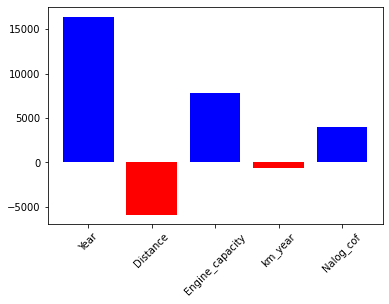

In [117]:
vis_weigths(np.hstack([b1]), features_names)

In [118]:
np.sum(np.abs(b1))

34717.49663512786

In [119]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_q, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_q, y_train)}',
      f'\nMSE: {MSE(y_test_predict_q, y_test)}')

r2_YpTest-YTest: -0.07983585965389772 
r2_YpTrain-YTrain: 0.016391956714952194 
MSE: 45649310.792763405


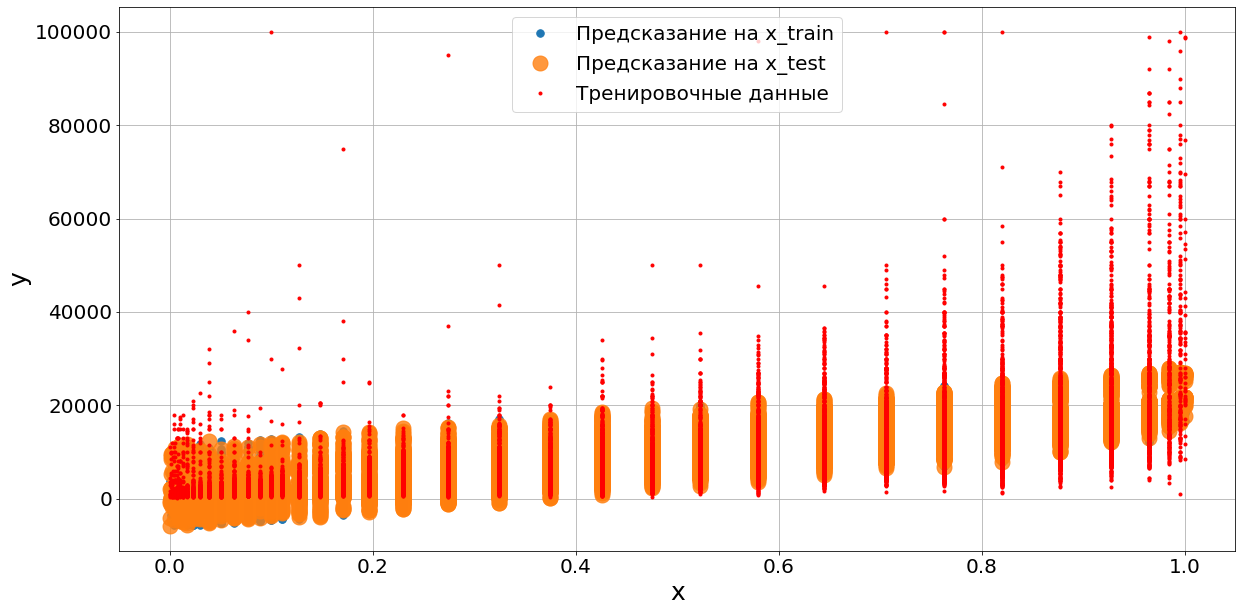

In [120]:
plot_model_weights(X_train_scaled_q, 
                    y_train, 
                    y_train_predict_q, 
                    X_test_scaled_q, 
                    y_test_predict_q)

## б) Данные c One-hote

### Подключение файлов

In [121]:
df = pd.read_csv('/content/drive/MyDrive/lectures/mf-ml/colab/dz/2/date/cars_moldova_onehot.csv', delimiter = ',')

### Обработка данных

In [122]:
df = df.drop(columns = ['Price_Ru']).copy()

In [123]:
cat_columns = []
num_columns = []
for column_name in df.columns:
  if (df[column_name].dtypes == object):
    cat_columns +=[column_name]
  else:
    num_columns +=[column_name]

In [124]:
df_num = df[num_columns].copy()

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Columns: 208 entries, Year to Dis_rating_medium
dtypes: float64(5), int64(203)
memory usage: 50.9 MB


In [125]:
#из ДФ удалить столбец Цены и его значения и присвоить их y, а остальные матрице X:
X_df,y_df = df_num.drop(columns = ['Price_euro']).values,df_num['Price_euro'].values

In [126]:
features_names = df_num.drop(columns = ['Price_euro']).columns

features_names

Index(['Year', 'Distance', 'Engine_capacity', 'km_year', 'Nalog_cof',
       'Make_Alfa Romeo', 'Make_Audi', 'Make_BMW', 'Make_Chevrolet',
       'Make_Chrysler',
       ...
       'Fuel_type_Electric', 'Fuel_type_Hybrid', 'Fuel_type_Metan/Propan',
       'Fuel_type_Petrol', 'Fuel_type_Plug-in Hybrid',
       'Transmission_Automatic', 'Transmission_Manual', 'Dis_rating_large',
       'Dis_rating_low', 'Dis_rating_medium'],
      dtype='object', length=207)

In [127]:
#производим разбиение на тренировочную и тестовую выборку(30%) и фиксируем случ.состояние (42):
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [128]:
def forward(weights, inputs): #весы и некие значения Х
    return inputs.dot(weights.T) #матричное произведение интутов на транспонированные весы

def loss_func(predicts, labels): #Предсказанные и истенные значения
        return np.square(predicts - labels)  

decline: [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5], 
yhat: [ 3875.  4650.  5425.  6200.  6975.  7750.  8525.  9300. 10075. 10850.
 11625.], 
y[0]: 7750.0, 
loss: [15015625.          9610000.          5405625.          2402500.
   600625.                0.           600625.          2402500.00000001
  5405625.          9610000.         15015625.        ]


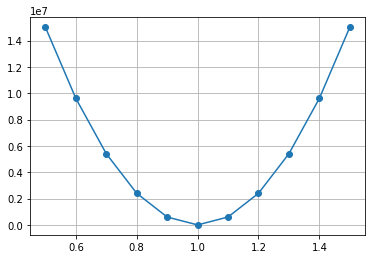

In [129]:
#при помоши графика проверим что наша функция квадратичная:
decline = np.linspace(start = 0.5, stop = 1.5,num = 11)
yhat = decline* y_df[0]
loss = loss_func(yhat, y_df[0])
plt.plot(decline,loss,'-o'); plt.grid(); 
print(f'decline: {decline}, \nyhat: {yhat}, \ny[0]: {y_df[0]}, \nloss: {loss}')

### Предварительная обработка - Нормализация

In [130]:
#проводим нормализацию для компенсации масштаба тренировочных данных:
scaler_mm = MinMaxScaler()
X_train_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

In [131]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_mm, y_train)
y_train_predict_mm = lr.predict(X_train_scaled_mm)
y_test_predict_mm = lr.predict(X_test_scaled_mm)
b0 = lr.intercept_
b1 = lr.coef_

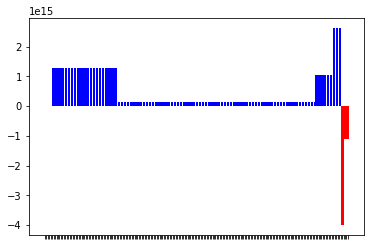

In [132]:
vis_weigths(np.hstack([b1]))

In [133]:
np.sum(np.abs(b1))

1.160869461885271e+17

In [134]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_mm, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_mm, y_train)}',
      f'\nMSE: {MSE(y_test_predict_mm, y_test)}')

r2_YpTest-YTest: 0.3836179779976542 
r2_YpTrain-YTrain: 0.43147188260458025 
MSE: 36247945.92598137


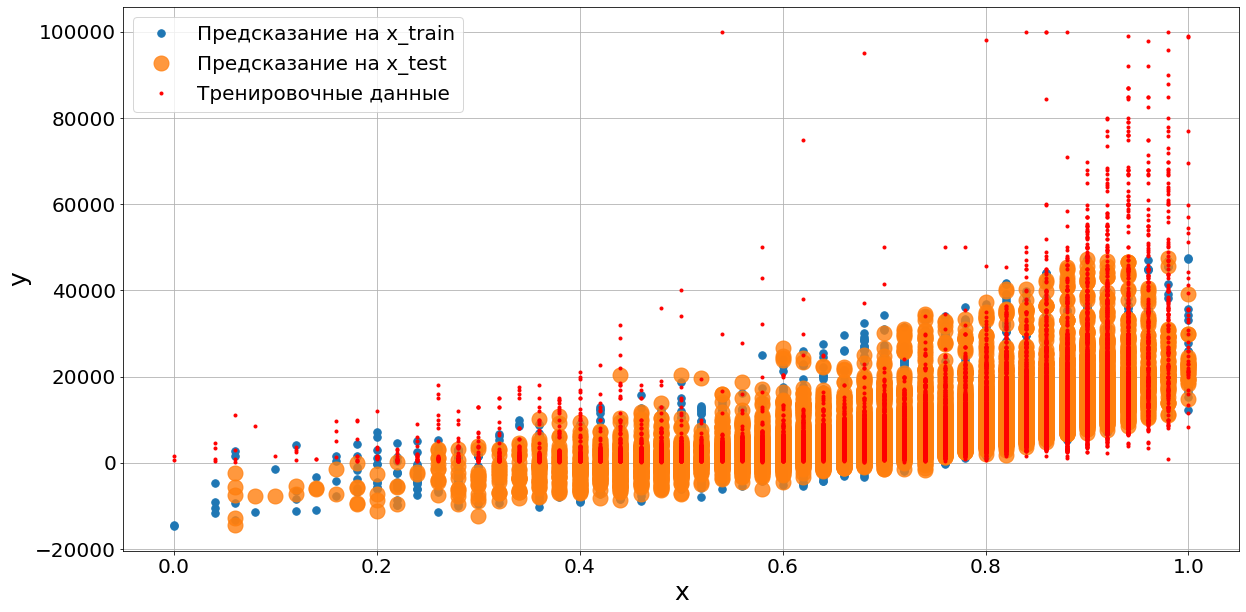

In [135]:
plot_model_weights(X_train_scaled_mm, 
                    y_train, 
                    y_train_predict_mm, 
                    X_test_scaled_mm, 
                    y_test_predict_mm
                  )

### Предварительная обработка - Стандартизация

In [136]:
#проводим стандартизацию для компенсации масштаба тренировочных данных:
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train)
X_test_scaled_s = scaler_s.transform(X_test)

In [137]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_s, y_train)
y_train_predict_s = lr.predict(X_train_scaled_s)
y_test_predict_s = lr.predict(X_test_scaled_s)
b0 = lr.intercept_
b1 = lr.coef_

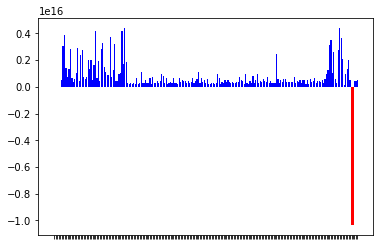

In [138]:
vis_weigths(np.hstack([b1]))

In [139]:
np.sum(np.abs(b1))

1.8919627110483706e+17

In [140]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_s, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_s, y_train)}',
      f'\nMSE: {MSE(y_test_predict_s, y_test)}')

r2_YpTest-YTest: -1.1491242878195562 
r2_YpTrain-YTrain: -1.150128512148627 
MSE: 126400244.90837707


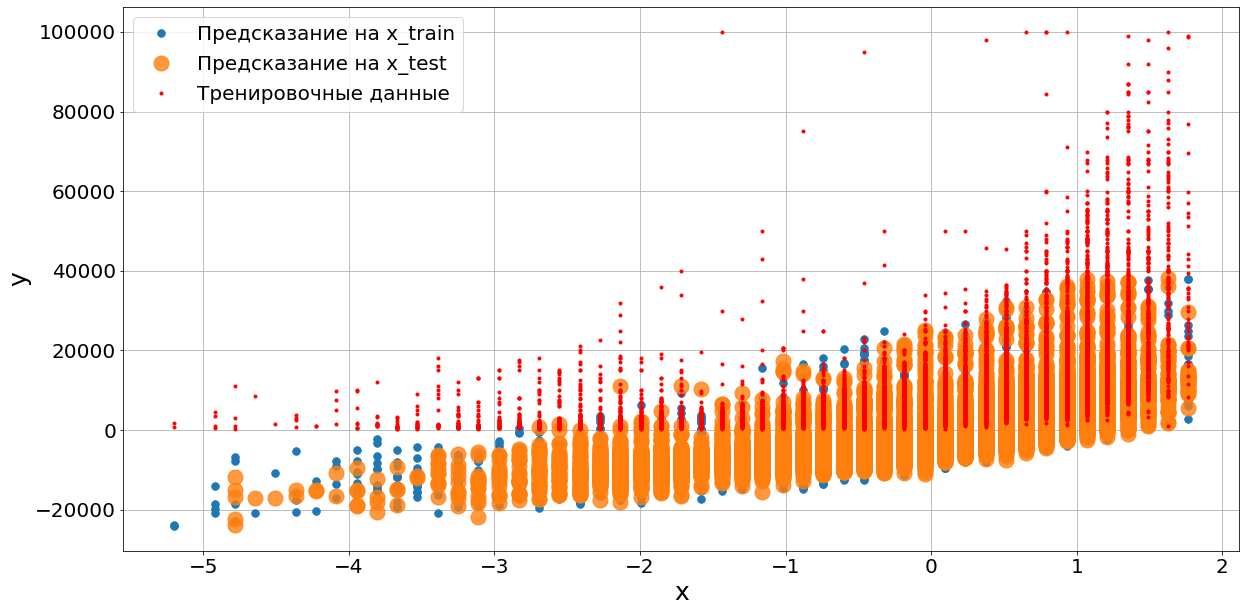

In [141]:
plot_model_weights(X_train_scaled_s, 
                  y_train, 
                  y_train_predict_s, 
                  X_test_scaled_s, 
                  y_test_predict_s)

### Предварительная обработка - Степенное преобразование

In [142]:
scaler_q = QuantileTransformer(random_state = 42)
X_train_scaled_q = scaler_q.fit_transform(X_train)
X_test_scaled_q = scaler_q.transform(X_test)

In [143]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train_scaled_q, y_train)
y_train_predict_q = lr.predict(X_train_scaled_q)
y_test_predict_q = lr.predict(X_test_scaled_q)
b0 = lr.intercept_
b1 = lr.coef_

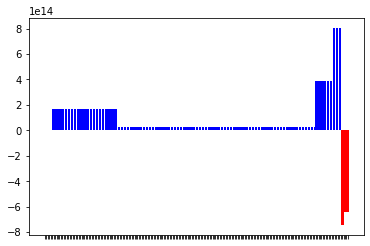

In [144]:
vis_weigths(np.hstack([b1]))

In [145]:
np.sum(np.abs(b1))

2.429051408841296e+16

In [146]:
print(f'r2_YpTest-YTest: {r2_score(y_test_predict_q, y_test)}',
      f'\nr2_YpTrain-YTrain: {r2_score(y_train_predict_q, y_train)}',
      f'\nMSE: {MSE(y_test_predict_q, y_test)}')

r2_YpTest-YTest: 0.48077076282360787 
r2_YpTrain-YTrain: 0.5218954044217359 
MSE: 32598317.31225157


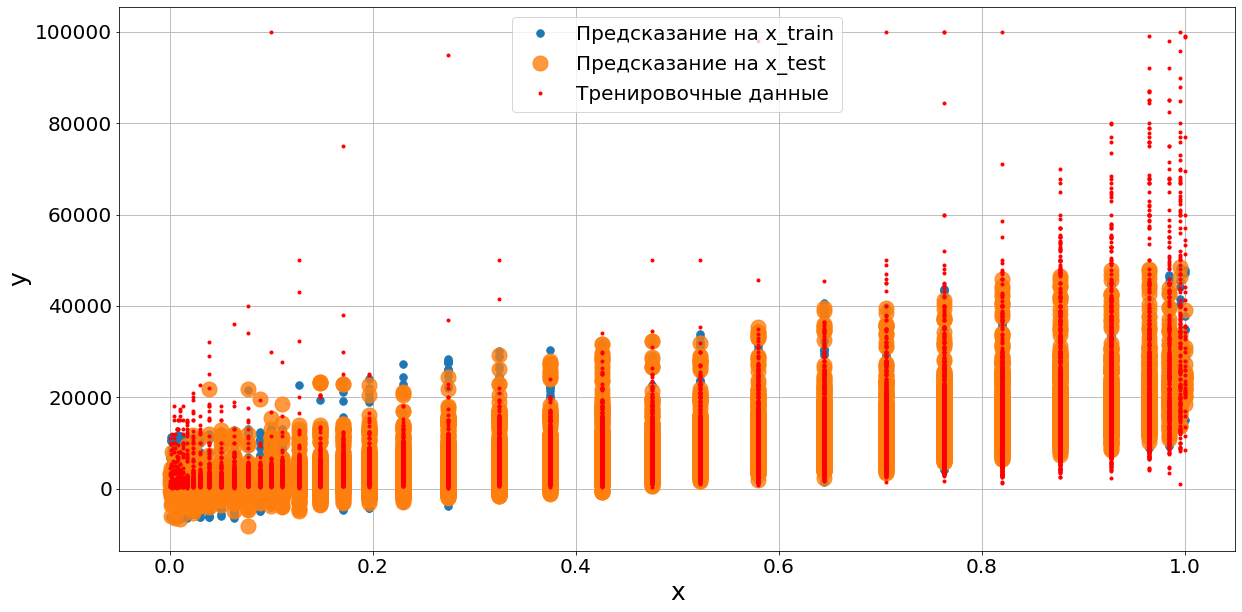

In [147]:
plot_model_weights(X_train_scaled_q, 
                    y_train, 
                    y_train_predict_q, 
                    X_test_scaled_q, 
                    y_test_predict_q)

## Вывод: 
На данном этапе линейная регрессия способная более-менее работать только с One-hot кодированием. 

Наилучший показатель R2 достигнут в One-hot + Степенное преобразование